In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Fetching the data from the startup_funding.csv file.
file_data=pd.read_csv("startup_funding.csv")

In [ ]:
# Copy the file_data to new_variable df

df=file_data.copy()

In [ ]:
df

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN
4,4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",NaN
...,...,...,...,...,...,...,...,...,...,...
2367,2367,29-01-2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
2368,2368,29-01-2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
2369,2369,30-01-2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
2370,2370,30-01-2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


# **Problem 1**

In [ ]:
# Here we are dropping all the rows which have null value in CityLocation column.
df.CityLocation.dropna(inplace=True)  

In [ ]:
# Here we are checking is there any null value left in CityLocation column.
df.CityLocation.isnull().sum()

179

In [ ]:
# As we have found the there is sum null value is left in CityLoaction column so 
# we are finding the index of those columns and will drop that index using drop method of pandas
index2=df.CityLocation[df.CityLocation.isnull()].index
print(index2)

Int64Index([ 928, 1093, 1139, 1219, 1236, 1960, 2064, 2117, 2201, 2202,
            ...
            2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371],
           dtype='int64', length=179)


In [ ]:
df.drop(index2, inplace=True)

In [ ]:
# Now i am checking again the is there any null value in CityLoaction column.
df.CityLocation.isnull().sum()

0

In [ ]:
# So as we have found that all the null value has been dropped, so we can proceed further.
df.CityLocation.replace("Delhi", "New Delhi", inplace=True)  # replacing Delhi to New Delhi
df.CityLocation.replace("bangalore", "Bangalore", inplace=True) # replacing bangalore to Bangalore

def separateCity(cityname):
  if '/' in cityname:
    cityLookup=['Gurgaon', 'Noida', 'New Delhi', 'Bangalore', 'Mumbai']
    l=[x.strip() for x in cityname.split('/')]
    if len(l)!=1:
      for y in l:
        if y!='' and y in cityLookup:
          return y
  else:
    return cityname.split('/')[0].strip()

df.CityLocation=df.CityLocation.apply(separateCity)

df.CityLocation.unique()



array(['Bangalore', 'Mumbai', 'New Delhi', 'Hyderabad', 'Ahmedabad',
       'Gurgaon', 'Noida', 'Pune', 'Kolkata', 'Trivandrum', 'Chennai',
       'Chandigarh', 'Jaipur', 'Vadodara', 'Surat', 'Missourie', 'Panaji',
       'Gwalior', 'Karur', 'Udupi', 'Kochi', 'Indore', 'Singapore', 'Goa',
       'Agra', 'Hubli', 'Kerala', 'Kozhikode', 'US', 'Coimbatore',
       'Siliguri', 'USA', 'Lucknow', 'Kanpur', 'London', None, 'Varanasi',
       'Bhopal', 'Jodhpur', 'Boston', 'Belgaum', 'Nagpur', 'Udaipur'],
      dtype=object)

In [ ]:
dict1 = df.CityLocation.value_counts()
print(dict1)

Bangalore     637
Mumbai        449
New Delhi     389
Gurgaon       241
Pune           84
Noida          79
Hyderabad      76
Chennai        66
Ahmedabad      35
Jaipur         25
Kolkata        19
Chandigarh     10
Vadodara        9
Indore          9
Goa             7
Singapore       5
Kanpur          4
Coimbatore      3
Bhopal          2
Siliguri        2
Gwalior         2
Udupi           2
Kochi           2
Trivandrum      2
Agra            2
Varanasi        1
Surat           1
Jodhpur         1
Boston          1
Belgaum         1
Nagpur          1
London          1
US              1
Lucknow         1
USA             1
Missourie       1
Kozhikode       1
Kerala          1
Hubli           1
Karur           1
Panaji          1
Udaipur         1
Name: CityLocation, dtype: int64


In [ ]:
index=dict1.index
value=dict1.values


In [ ]:
city=[]
val=[]
CityLook=['Gurgaon', 'Noida', 'New Delhi', 'Bangalore', 'Mumbai']
for i in range(len(index)):
  if index[i] in CityLook:
    city.append(index[i])
    val.append(value[i])

print(city)
print(val)

maxfunding=max(val)
indexofMaxFundingCity=val.index(maxfunding)
print("Maximum Funding is done in",end=' ')
print(city[indexofMaxFundingCity], val[indexofMaxFundingCity],end=' ')

print("times.")

['Bangalore', 'Mumbai', 'New Delhi', 'Gurgaon', 'Noida']
[637, 449, 389, 241, 79]
Maximum Funding is done in Bangalore 637 times.


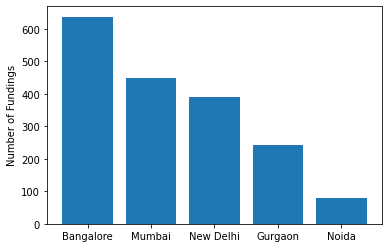

In [ ]:
plt.bar(city, val)
plt.ylabel("Number of Fundings")
plt.show()

# **Problem 2**

Top 5 Investors are:
Sequoia Capital - 64
Accel Partners - 53
Kalaari Capital - 44
SAIF Partners - 41
Indian Angel Network - 40


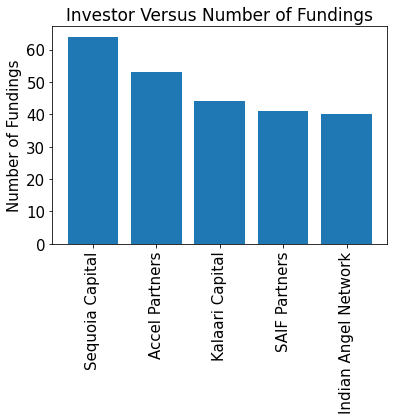

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df['InvestorsName'].dropna(inplace=True)
d= {}

index2=df.InvestorsName[df.InvestorsName.isnull()].index
df.drop(index2, inplace=True)

def investor_count(investor):
    l = investor.split(',')
    for i in l:
        i = i.strip()
        d[i]=d.get(i,0)+1
        
df['InvestorsName'].apply(investor_count)

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()

# **Problem 3**

Top 5 investors are:
Sequoia Capital - 48
Accel Partners - 47
Kalaari Capital - 41
Indian Angel Network - 40
Blume Ventures - 36


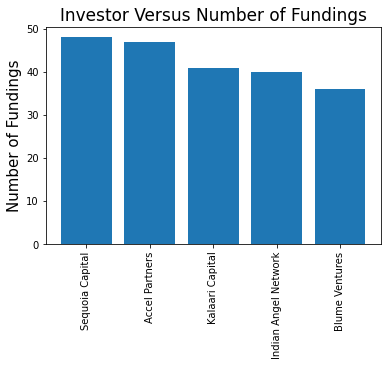

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("startup_funding.csv", encoding="utf-8")
df.dropna(subset=["InvestorsName", "StartupName"],inplace=True)
df["StartupName"].replace("Flipkart.com", "Flipkart", inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

d={}
for i in range(len(investor_list)):
  investor=investor_list[i].split(',')
  for invest in investor:
    invest=invest.strip()
    if invest != "":
      if invest in d:
          s=d[invest]
          s.add(startup[i])
          d[invest]=s
      else:
          d[invest]={startup[i]}

for key in d:
  d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print("Top 5 investors are:")
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])

plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.xticks(rotation="vertical")
plt.show()



# **Problem 4**

Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:
Indian Angel Network - 33
Rajan Anandan - 23
LetsVenture - 16
Anupam Mittal - 16
Group of Angel Investors - 14


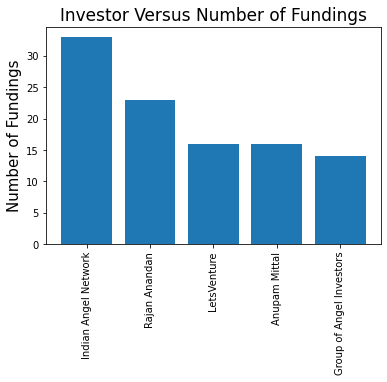

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("startup_funding.csv", encoding="utf-8")
df.dropna(subset=["InvestorsName", "StartupName", "InvestmentType"],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df["StartupName"].replace("Flipkart.com", "Flipkart", inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df=df[(df.InvestmentType=='Seed Funding') | (df.InvestmentType=='Crowd Funding')]

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

d={}
for i in range(len(investor_list)):
  investor=investor_list[i].split(',')
  for invest in investor:
    invest=invest.strip()
    if (invest != "") and (invest != "Undisclosed Investors"):
      if invest != "":
        if invest in d:
            s=d[invest]
            s.add(startup[i])
            d[invest]=s
        else:
            d[invest]={startup[i]}

for key in d:
  d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print("Top 5 Investors for Investment type- Seed Funding and Crowd Funding are:")
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])

plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.xticks(rotation="vertical")
plt.show()



# **Problem 5**

Top 5 Investors for Investment type- Private Equity are:
Sequoia Capital - 45
Accel Partners - 43
Kalaari Capital - 35
Blume Ventures - 27
SAIF Partners - 24


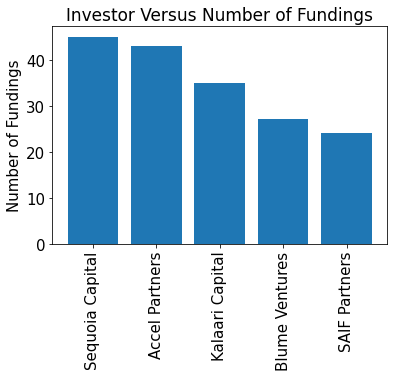

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df.dropna(subset=['InvestorsName','StartupName','InvestmentType'],inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df['InvestorsName'].replace('Undisclosed investors','Undisclosed Investors',inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

df=df[df.InvestmentType=='Private Equity']

startup=list(df.StartupName)
investor_list=list(df.InvestorsName)

d={}
for i in range(len(investor_list)):
    investor = investor_list[i].split(',')
    for invest in investor:
        invest=invest.strip()
        if (invest != "") and (invest != "Undisclosed Investors"):
            if invest in d:
                s=d[invest]
                s.add(startup[i])
                d[invest]=s
            else:
                d[invest]={startup[i]}

for key in d:
    d[key]=len(d[key])

investor_name=np.array(list(d.keys()))
number_of_fundings=np.array(list(d.values()))

ind=number_of_fundings.argsort()[::-1]
ind=ind[:5]

investor_name=investor_name[ind]
number_of_fundings=number_of_fundings[ind]

print('Top 5 Investors for Investment type- Private Equity are:')
for i in range(len(investor_name)):
    print(investor_name[i],'-',number_of_fundings[i])
    
plt.bar(investor_name,number_of_fundings)
plt.ylabel('Number of Fundings',fontsize=15)
plt.title('Investor Versus Number of Fundings',fontsize=17)
plt.yticks(fontsize=15)
plt.xticks(rotation='vertical',fontsize=15)
plt.show()
